In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Model
def hamiltonian(energy):
    lattice_size=len(energy)
    I=np.ones(lattice_size-1)
    H=np.diagflat(I,1)+np.diagflat(I,-1)+np.diagflat(energy)
    H[lattice_size-1,0]=1
    H[0,lattice_size-1]=1
    return H
lattice_size=5000
W=2
energy=np.random.uniform(-W/2,W/2,lattice_size)
H=hamiltonian(energy)
Lambda,w=np.linalg.eigh(H)

1.0


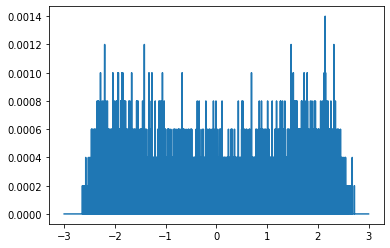

In [5]:
#Density of states
rho_E,E=np.histogram(Lambda,bins=6000,range=(-3,3))
rho_E=rho_E/np.sum(rho_E)
E=E[:-1]
plt.plot(E,rho_E)
print(rho_E.sum())

0.019885276167207776 0.1 0.1
8.088241831408583e-05 0.1 0.5
7.275497458089278e-05 0.1 1.0
6.015269675212897e-05 0.1 1.5
7.379938540713499e-05 0.1 2.0
8.268281431603918e-05 0.1 2.5
0.00011105641921683204 0.1 3.0
0.00012628239554864326 0.1 3.5
0.00022996232220526123 0.1 4.0
0.0022106305820920108 0.2 0.1
4.9755517775150236e-05 0.2 0.5
7.011307649318514e-05 0.2 1.0
0.00010996066869442146 0.2 1.5
0.0001587265462590353 0.2 2.0
0.00035333670055782014 0.2 2.5
0.0005271192323220156 0.2 3.0
0.000300938619052771 0.2 3.5
0.0006233119755240364 0.2 4.0
0.00021002870979386134 0.4 0.1
8.160071474518809e-05 0.4 0.5
0.0005817095152518694 0.4 1.0
0.0013618967298105835 0.4 1.5
0.0011189285102222368 0.4 2.0
0.0016125556940827905 0.4 2.5
0.0020117137247835214 0.4 3.0
0.001633729607412711 0.4 3.5
0.0018453065561425308 0.4 4.0
0.00010169556216229795 0.6 0.1
0.00042534842234590384 0.6 0.5
0.0026448580721915803 0.6 1.0
0.0047716006101277695 0.6 1.5
0.004167461430102914 0.6 2.0
0.004750957915152507 0.6 2.5
0.0052

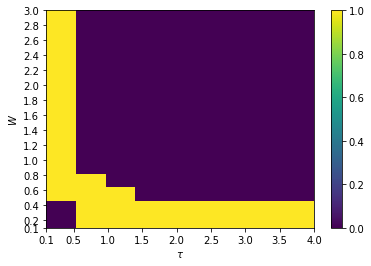

In [51]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import h5py
#Get currend directory
cwd = os.getcwd()
cwd=os.path.join(cwd,'data_19_05')
Image_dir=os.path.join(cwd,'Images')
W=[0.1,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0]
Tau=[0.1,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]
K=100
x=np.arange(K,501,1)
grid=np.empty((len(W),len(Tau)))
epsilon=1.0e-3 #Tolerance
for j,w in enumerate(W):
    for i,tau in enumerate(Tau):
        filename=f'anderson:W={w},t={tau},n=500.h5'
        #Load data
        filename=os.path.join(cwd,filename)
        with h5py.File(filename,'r') as f:
            y=f['detection_time'][:]
        y=np.log(np.mean(y[:,K-1:],axis=0))
        alpha,b=np.polyfit(x,y,1)
        y_fit=x*alpha+b
        mse=np.mean((y-y_fit)**2)
        print(mse,w,tau)
        if mse<epsilon:
            grid[j,i]=1
        else:
            grid[j,i]=0
        # plt.plot(x,y)
        # #Make label of the plot in scientific notation
        # plt.plot(x,alpha*x+b,label=rf'$\alpha$={alpha:.2e}')
        # plt.title(rf'Model: $W$={w},$\tau$={tau}')
        # plt.xlabel(r'$n$')
        # plt.ylabel(r'$F_n$')
        # plt.legend()
        # plt.show()
plt.imshow(grid,extent=[Tau[0],Tau[-1],W[0],W[-1]],origin='lower',aspect='auto')
plt.xticks(Tau)
plt.yticks(W)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$W$')
plt.colorbar()
plt.show()